In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m1_rbm = np.load("closed_loop_recon_sh48-to-m1-rbm.pkl",allow_pickle=True)
print(m1_rbm.keys())
print(m1_rbm['calib'][0].keys())
len(m1_rbm['calib'])
print(m1_rbm['calib'][0]["m1_closed_loop_to_sensor"].keys())


dict_keys(['calib', 'pinv', 'data', 'estimate', 'mode'])
dict_keys(['m1_to_closed_loop_sensor', 'm2_to_closed_loop_sensor', 'm1_to_m2', 'm1_to_sensor', 'm2_to_sensor', 'm1_closed_loop_to_sensor'])
dict_keys(['sid', 'n_mode', 'c', 'mask', 'mode', 'runtime', 'n_cols'])


In [78]:
whos

Variable     Type         Data/Info
-----------------------------------
ax0          Axes         Axes(0.125,0.119242;0.281818x0.751515)
ax1          Axes         Axes(0.547727,0.11;0.352273x0.77)
fig          Figure       Figure(1000x375)
h            AxesImage    AxesImage(size=(6, 6))
i            int          5
m            ndarray      568x27: 15336 elems, type `float64`, 122688 bytes (119.8125 kb)
m1_bm        dict         n=5
m1_rbm       dict         n=5
m1_rbm_c     ndarray      1024x6: 6144 elems, type `float64`, 49152 bytes
m1s1_bm_c    ndarray      1024x27: 27648 elems, type `float64`, 221184 bytes (216.0 kb)
m1s1_rbm_c   ndarray      998x6: 5988 elems, type `float64`, 47904 bytes
mat          ndarray      568x32: 18176 elems, type `float64`, 145408 bytes (142.0 kb)
np           module       <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
plt          module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
r            ndarray      568x5: 2840 elems, ty

In [79]:
vt[-1,:]

array([ 9.93661769e-01, -3.28902742e-03, -5.80457501e-04, -1.28147999e-03,
       -1.93596982e-02, -1.10673814e-01])

In [3]:
def show_svd(mat):
    u,s,vt = np.linalg.svd(mat,full_matrices=False)

    fig,(ax0,ax1) = plt.subplots(ncols=2,figsize=(12,3.75))
    h = ax0.imshow(vt.T,cmap="RdBu")
    #ax0.set_yticks(range(6))
    #ax0.set_yticklabels(["Tx","Ty","Tz","Rx","Ry","Rz"])
    ax0.grid()
    ax0.set_title("eigen modes")
    fig.colorbar(h,ax=ax0)
    ax1.semilogy(s/s[0],'.-')
    ax1.grid()
    ax1.set_title("eigen values");

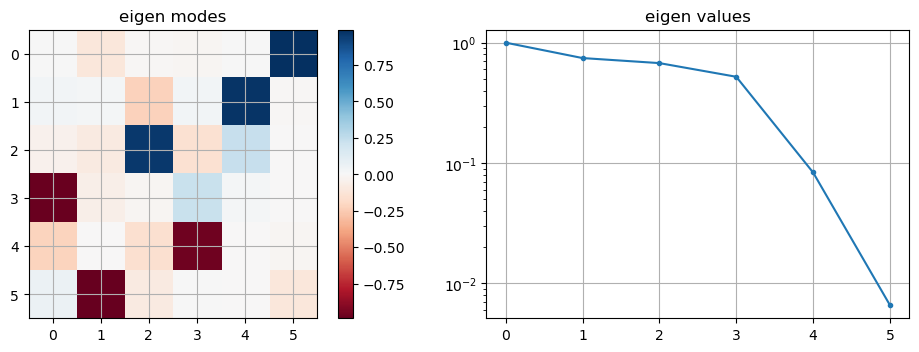

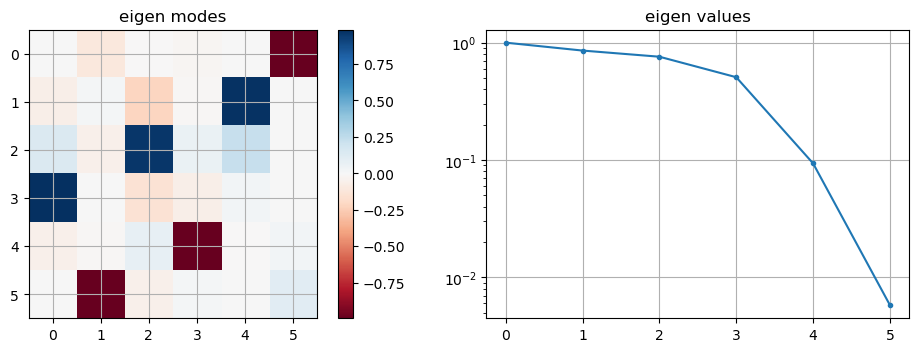

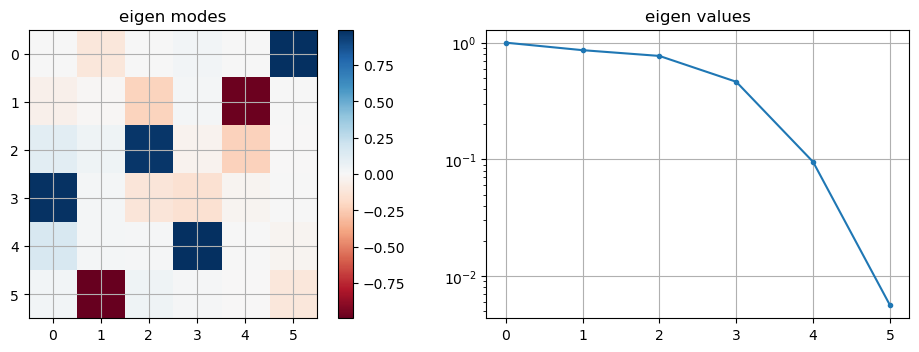

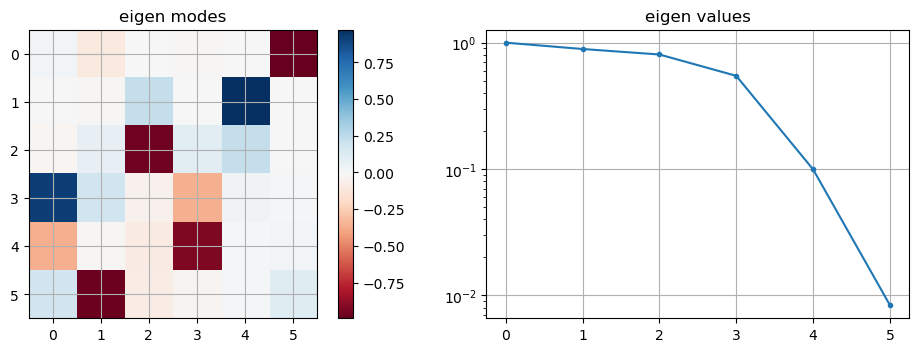

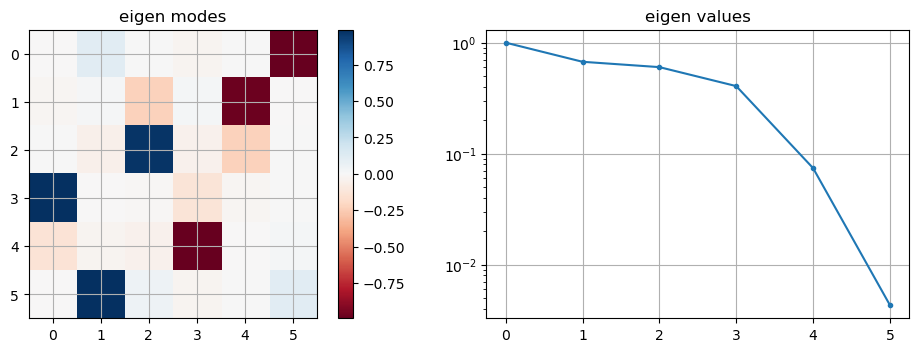

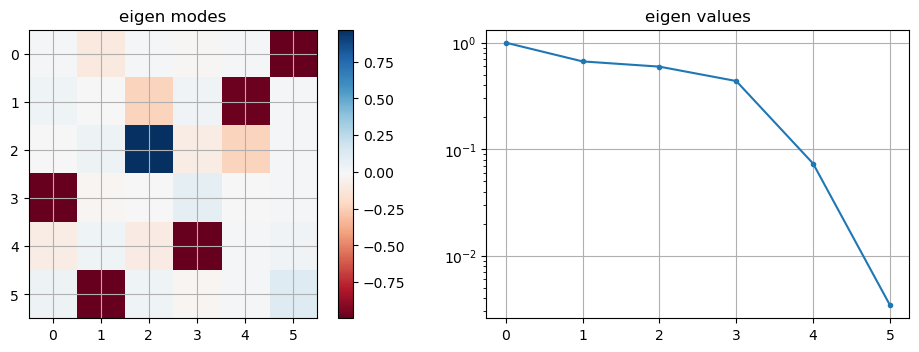

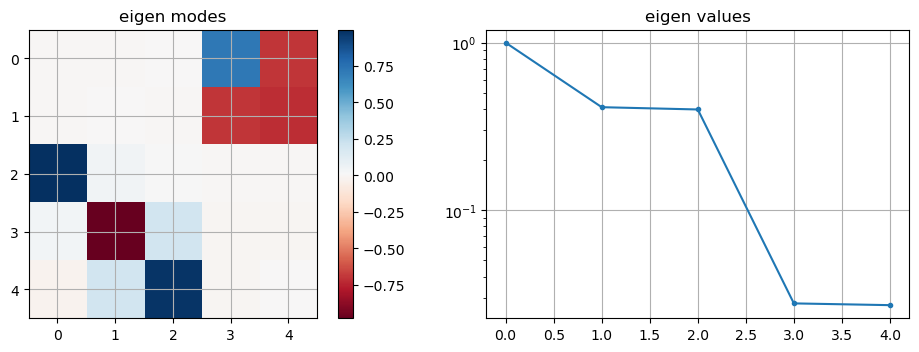

In [4]:
m1_rbm = np.load("closed_loop_recon_sh48-to-m1-rbm.pkl",allow_pickle=True)
for i in range(6):
    show_svd(np.asarray(m1_rbm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(6,-1).T)
show_svd(np.asarray(m1_rbm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(5,-1).T)


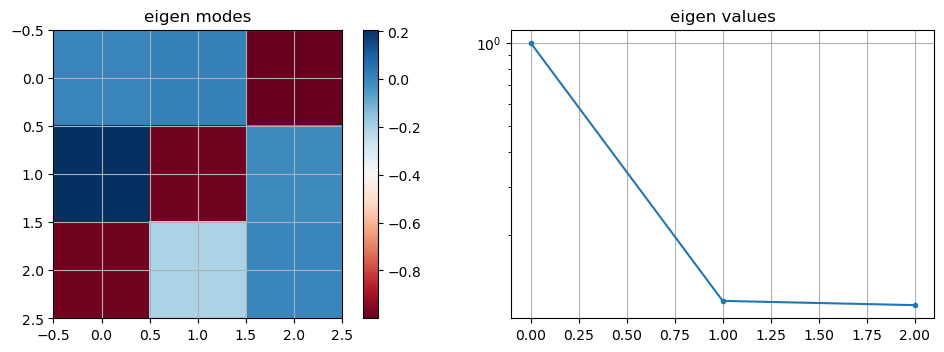

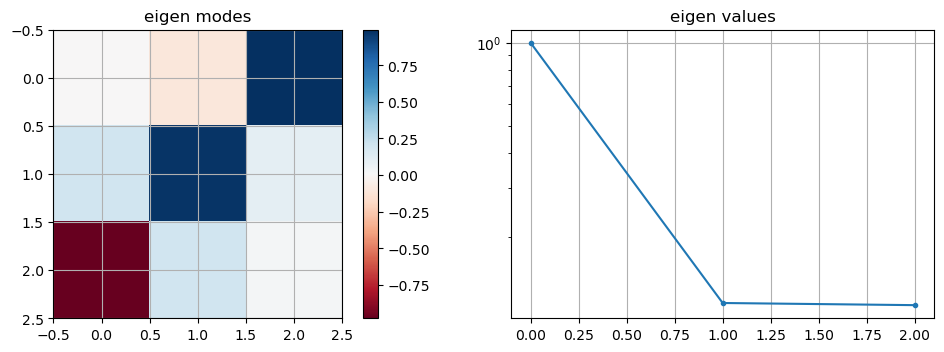

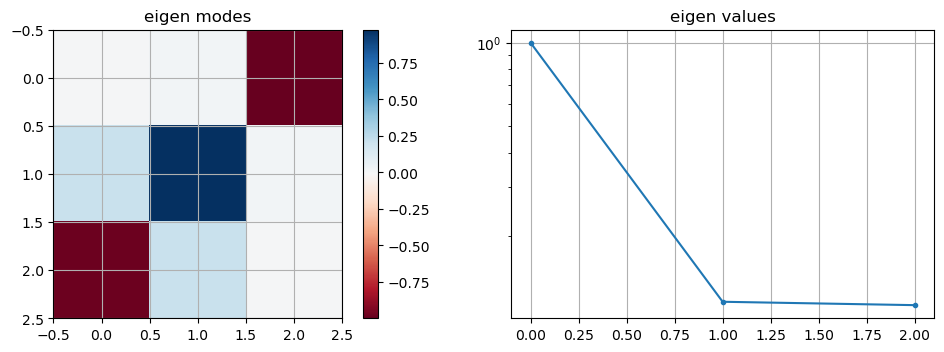

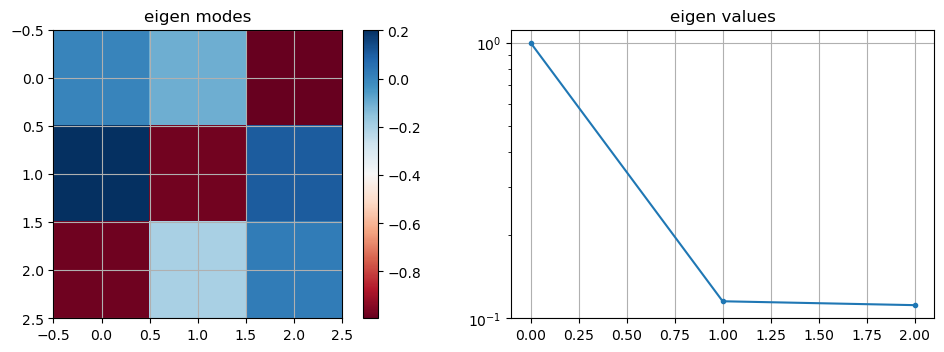

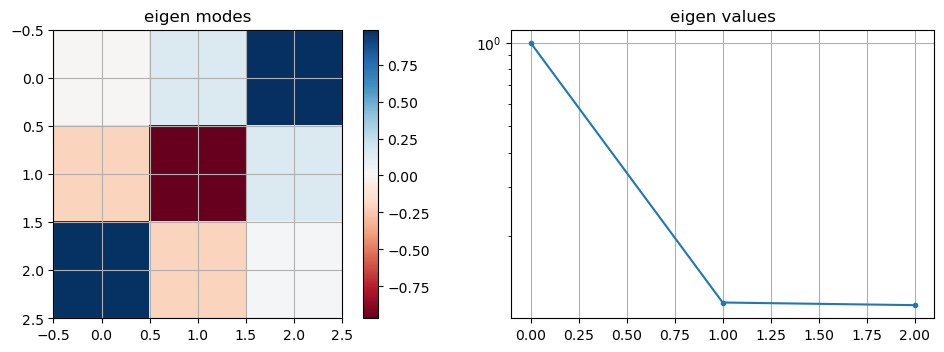

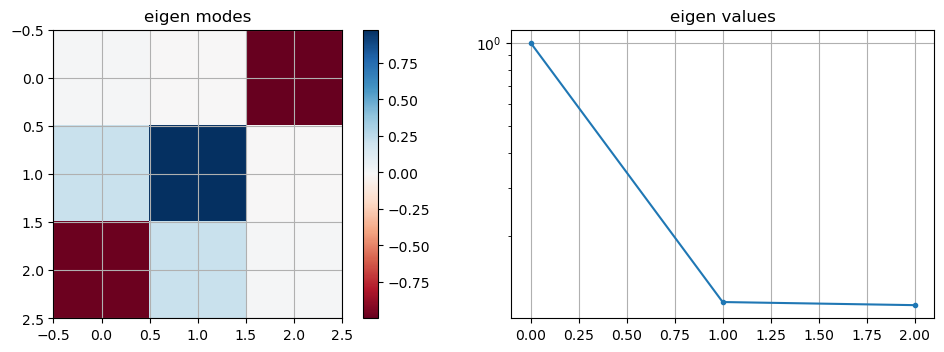

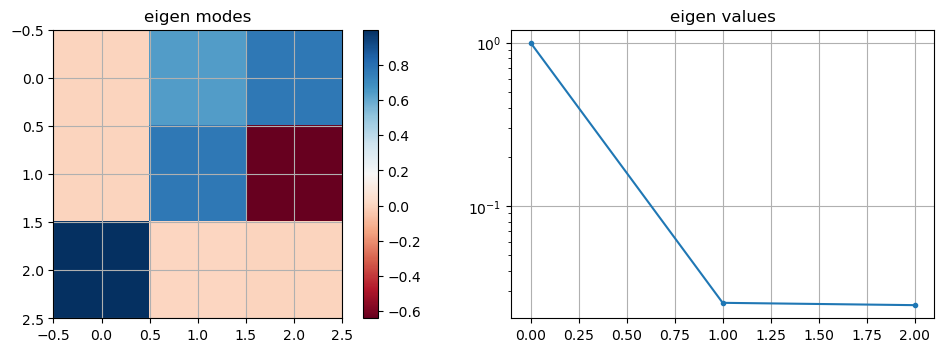

In [5]:
m2_rbm = np.load("closed_loop_recon_sh48-to-m2-rbm.pkl",allow_pickle=True)
for i in range(6):
    show_svd(np.asarray(m2_rbm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(3,-1).T)
show_svd(np.asarray(m2_rbm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(3,-1).T)


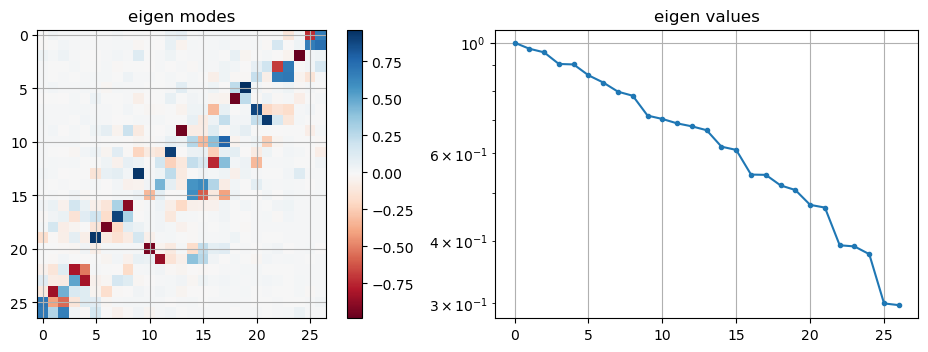

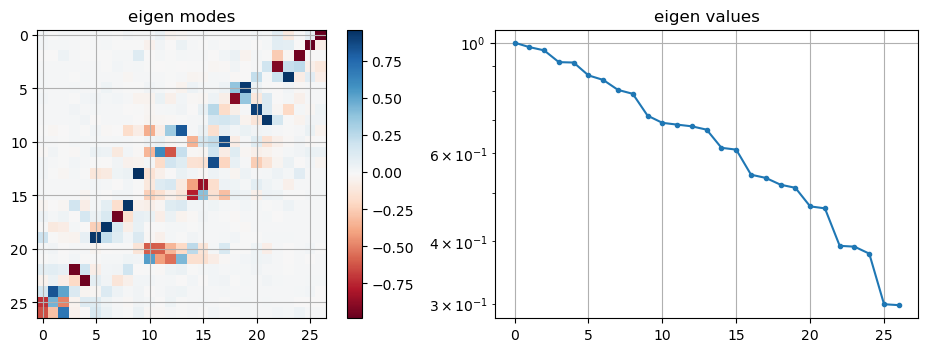

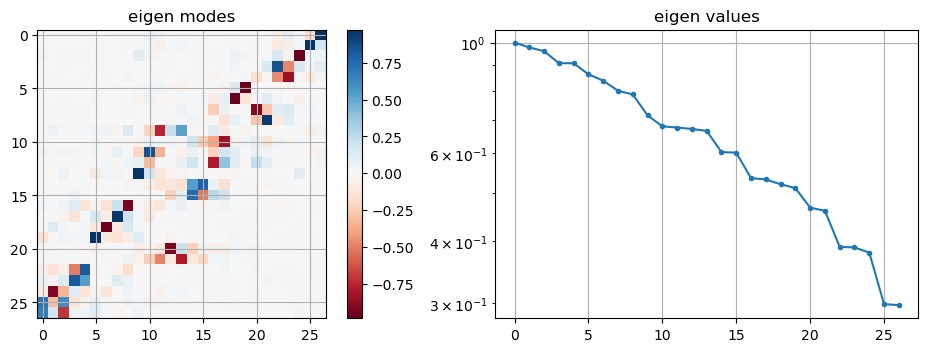

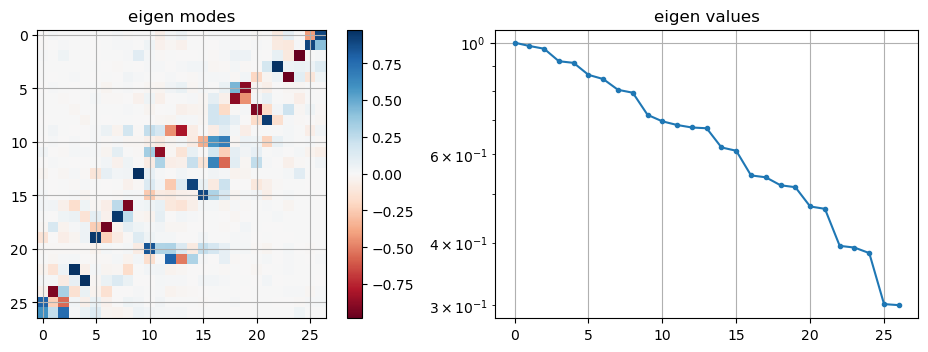

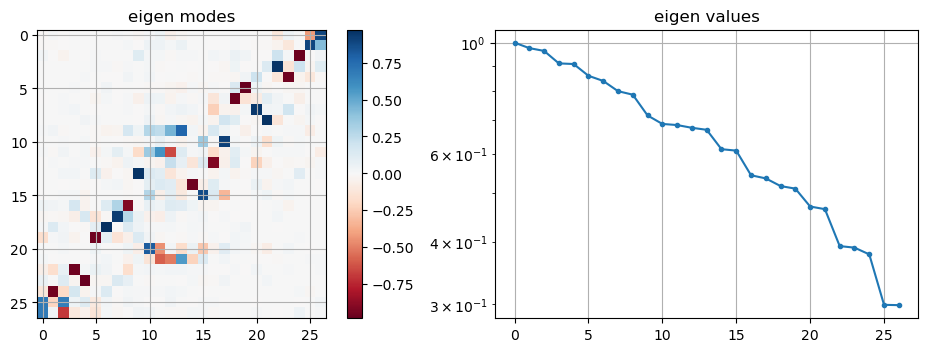

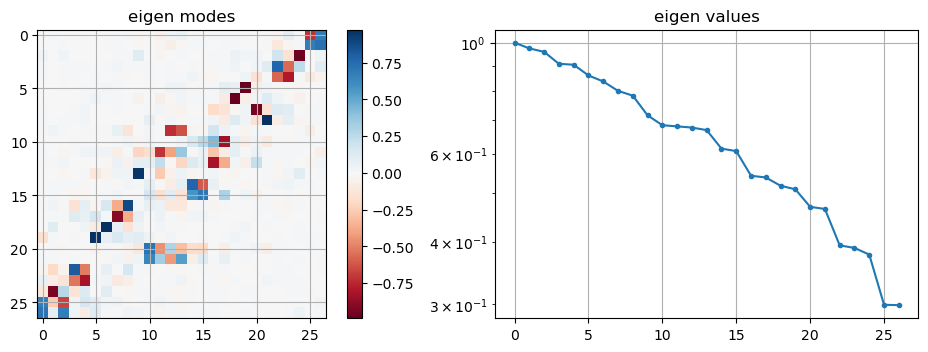

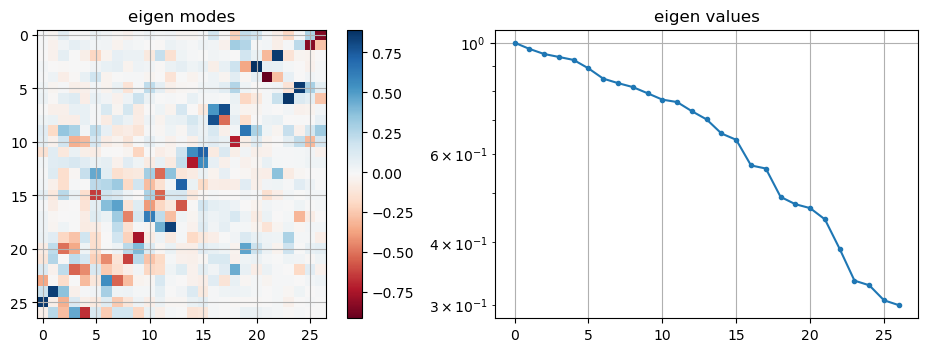

In [6]:
m1_bm = np.load("closed_loop_recon_sh48-to-m1-bm.pkl",allow_pickle=True)
for i in range(7):
    show_svd(np.asarray(m1_bm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(27,-1).T)


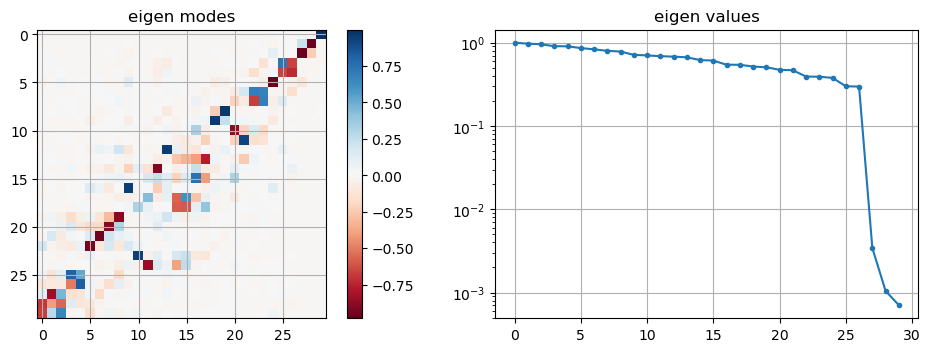

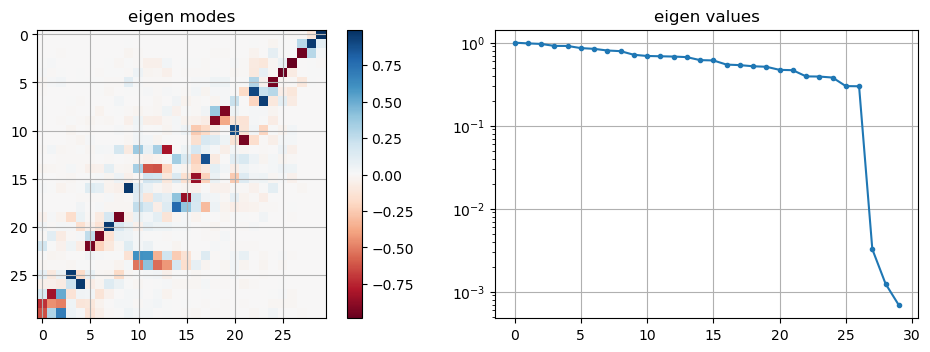

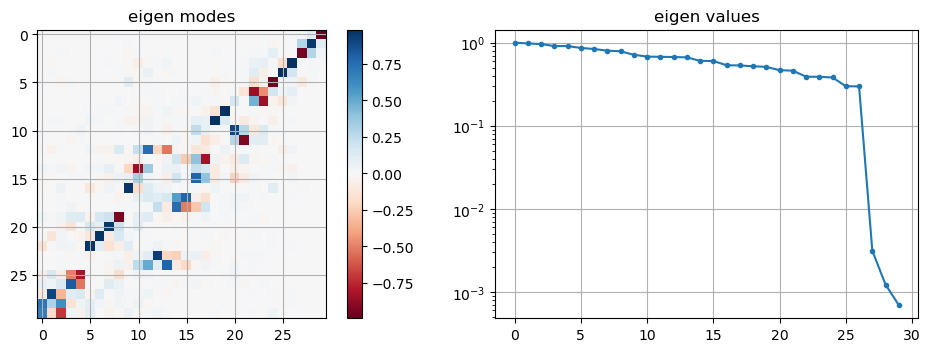

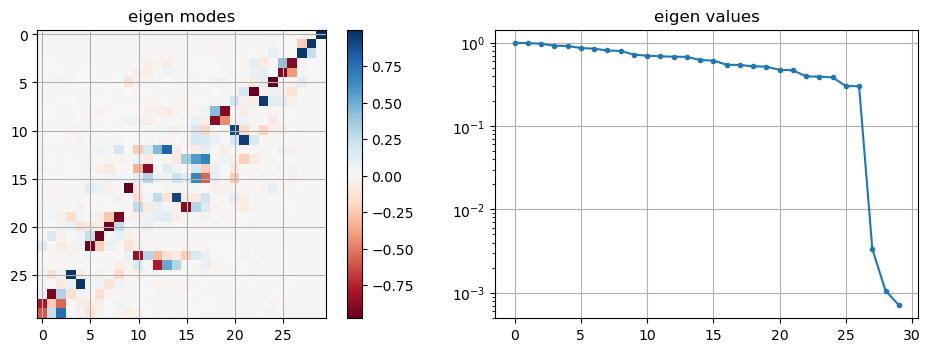

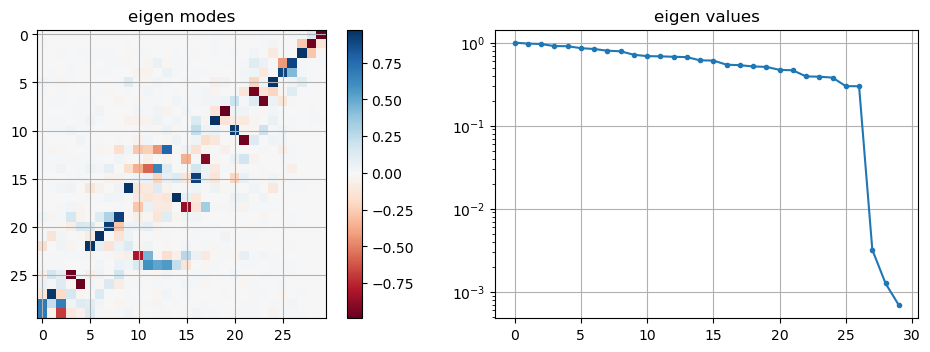

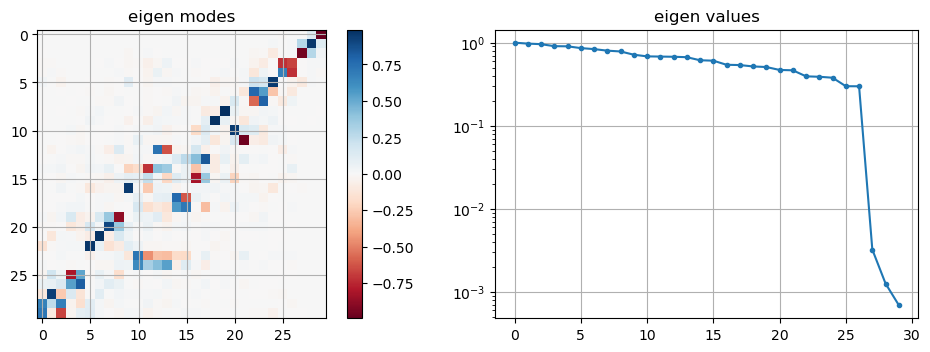

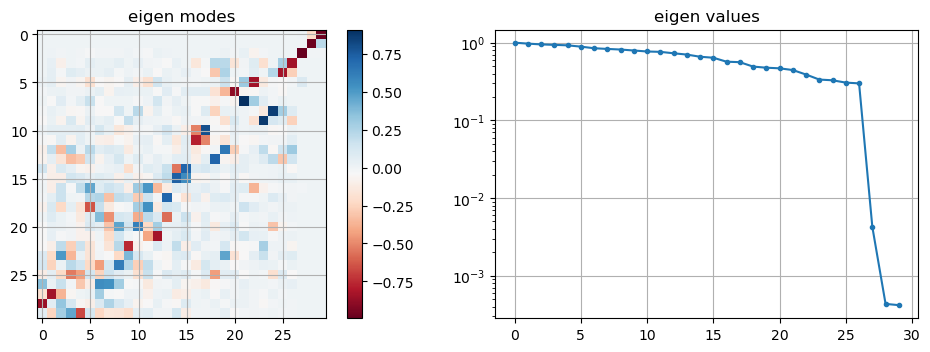

In [8]:
for i in range(6):
    r = np.asarray(m2_rbm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(3,-1).T
    m = np.asarray(m1_bm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(27,-1).T
    mat = np.hstack([r,m])
    show_svd(mat)
r = np.asarray(m2_rbm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(3,-1).T
m = np.asarray(m1_bm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(27,-1).T
mat = np.hstack([r,m])
show_svd(mat)

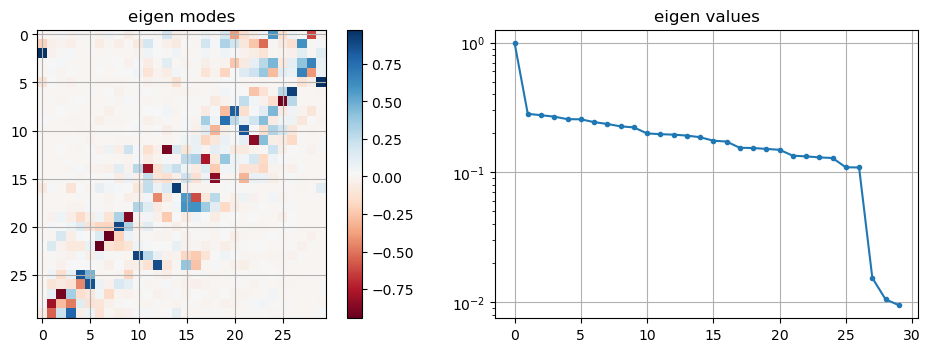

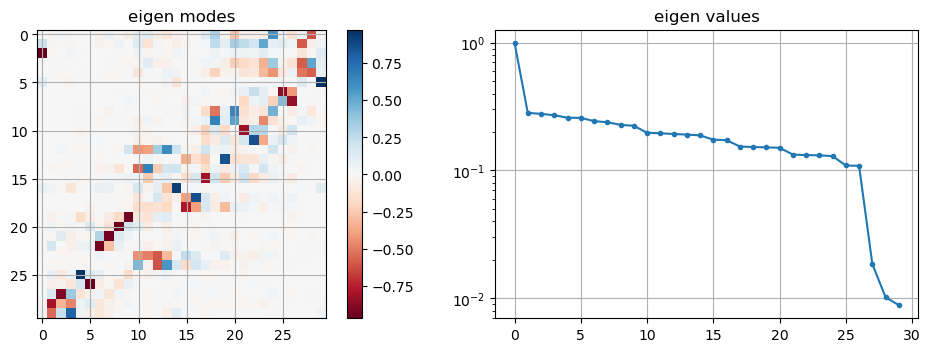

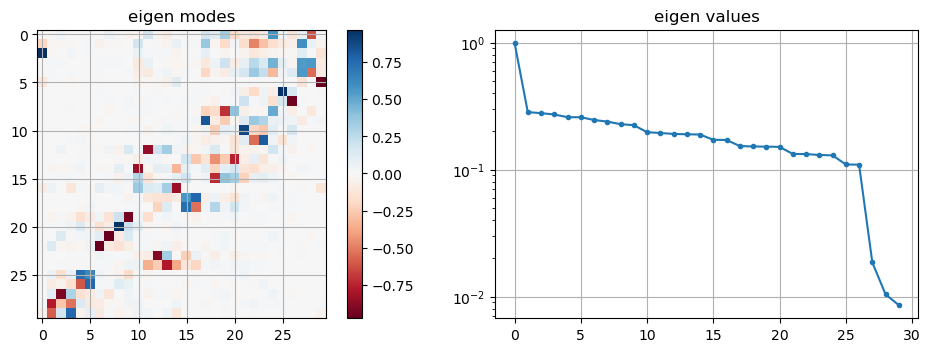

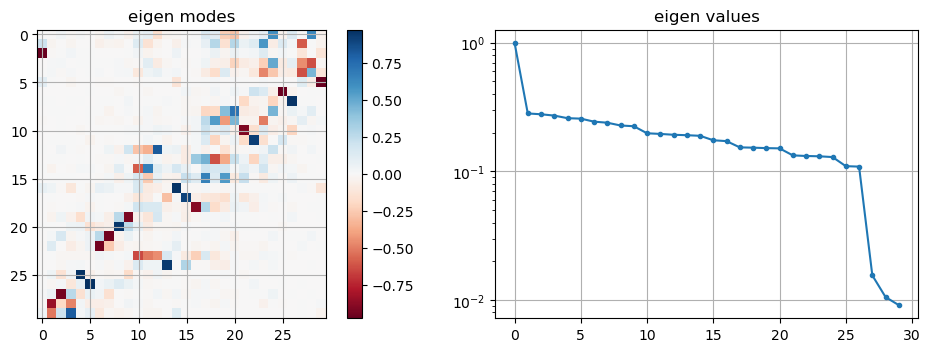

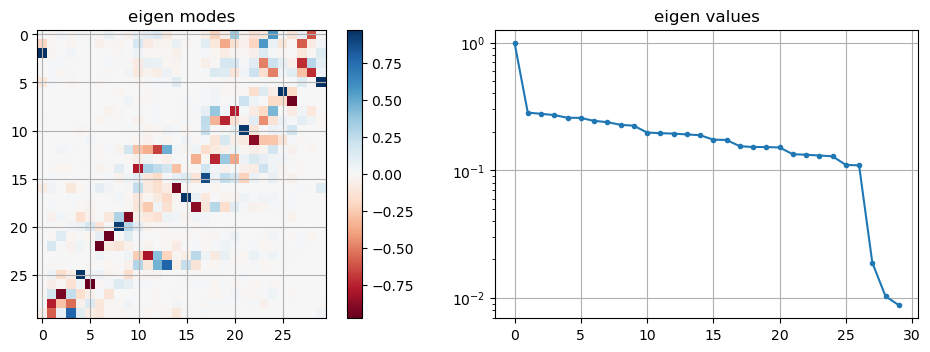

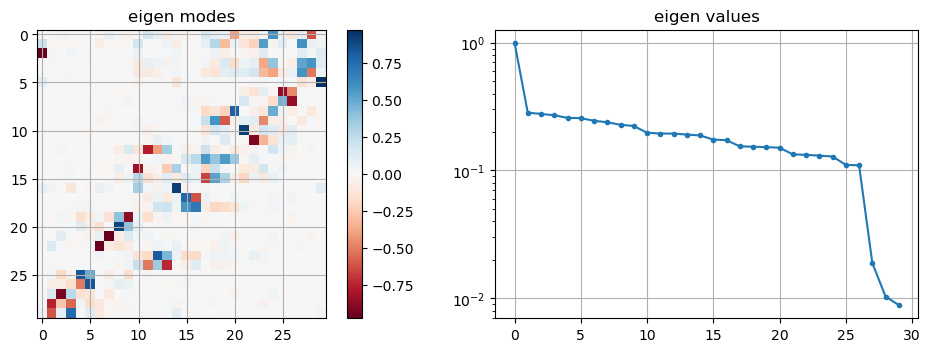

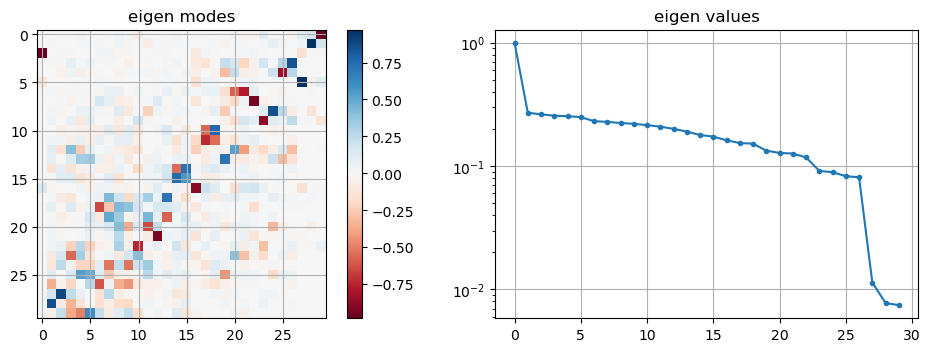

In [9]:
for i in range(6):
    r = np.asarray(m2_rbm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(3,-1).T
    m = np.asarray(m1_bm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(27,-1).T
    mat = np.hstack([r/np.linalg.norm(r),m/np.linalg.norm(m)])
    show_svd(mat)
r = np.asarray(m2_rbm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(3,-1).T
m = np.asarray(m1_bm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(27,-1).T
mat = np.hstack([r/np.linalg.norm(r),m/np.linalg.norm(m)])
show_svd(mat)

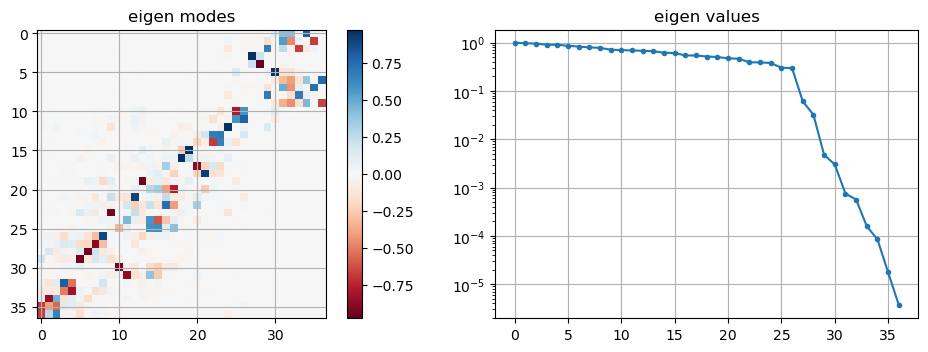

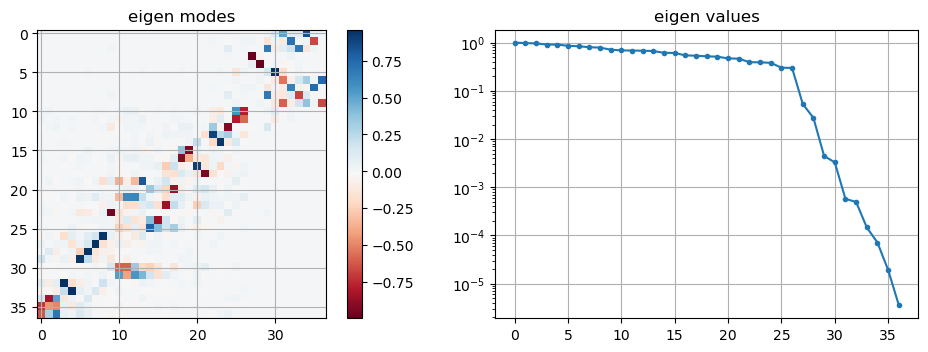

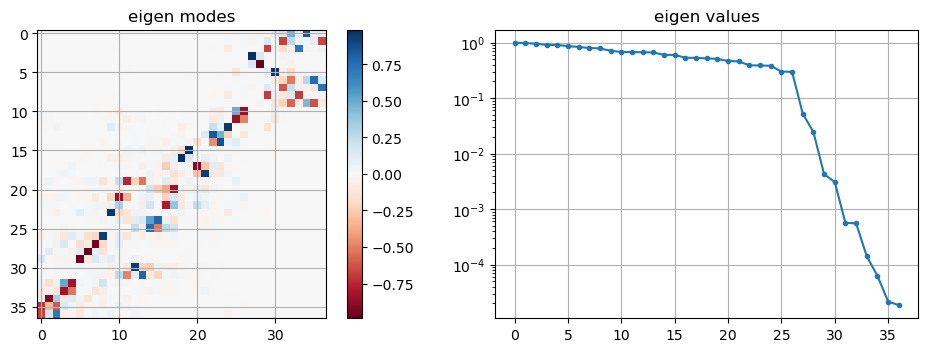

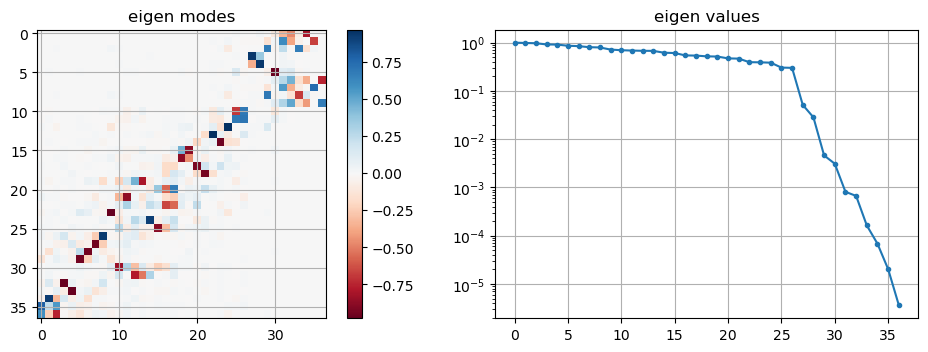

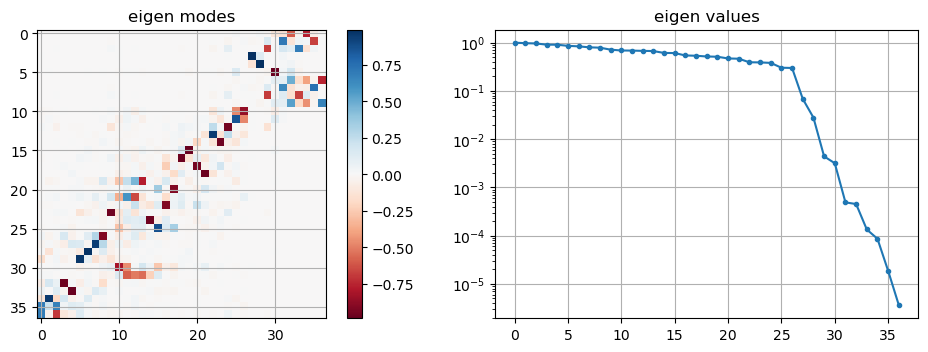

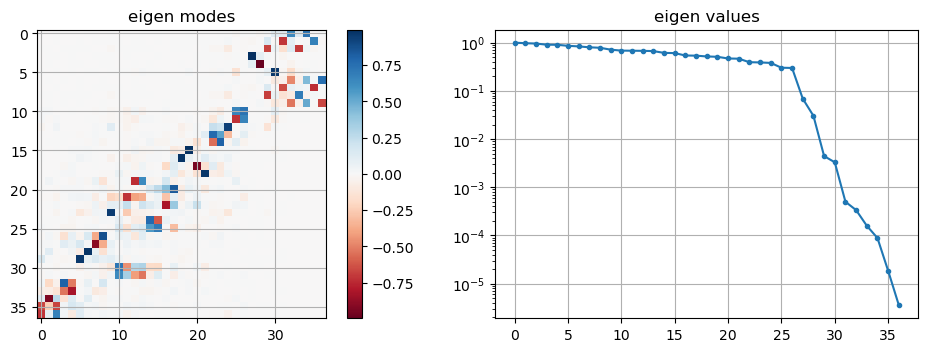

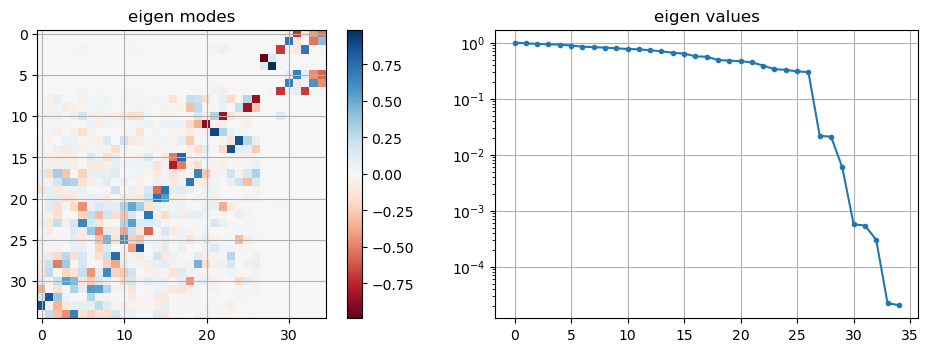

In [91]:
for i in range(6):
    r1 = np.asarray(m1_rbm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(6,-1).T
    r2 = np.asarray(m2_rbm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(4,-1).T
    m = np.asarray(m1_bm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(27,-1).T
    mat = np.hstack([r1,r2,m])
    show_svd(mat)
r1 = np.asarray(m1_rbm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(5,-1).T
r2 = np.asarray(m2_rbm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(3,-1).T
m = np.asarray(m1_bm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(27,-1).T
mat = np.hstack([r1,r2,m])
show_svd(mat)

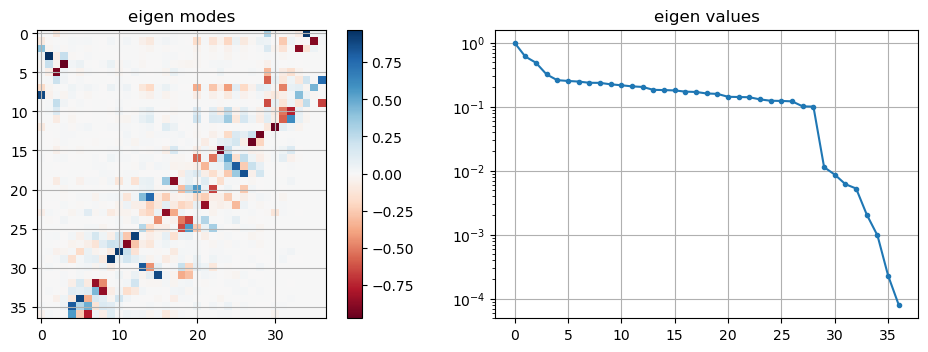

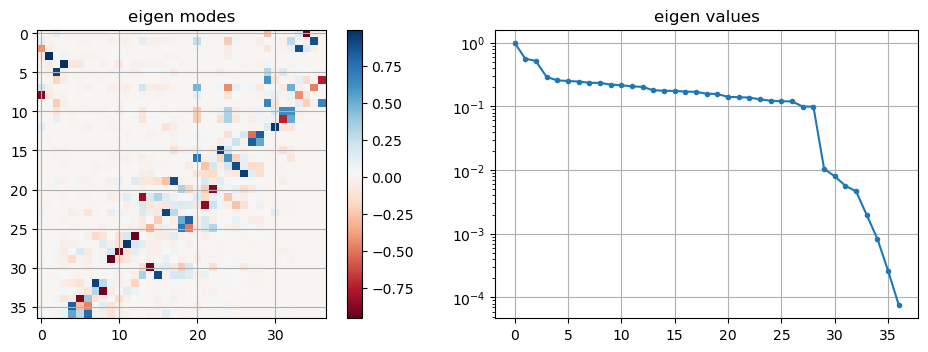

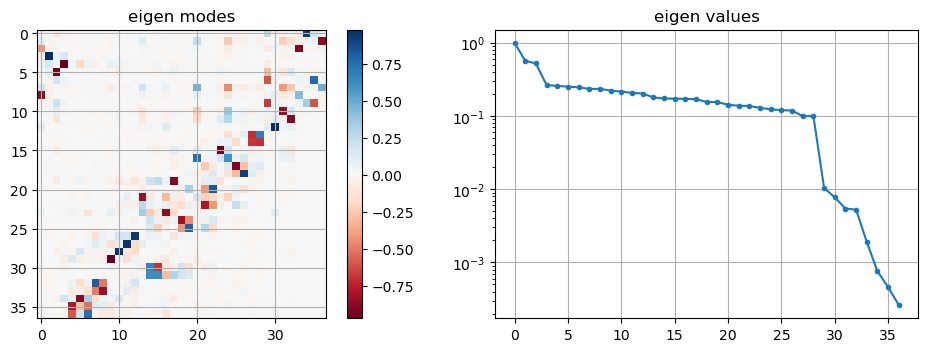

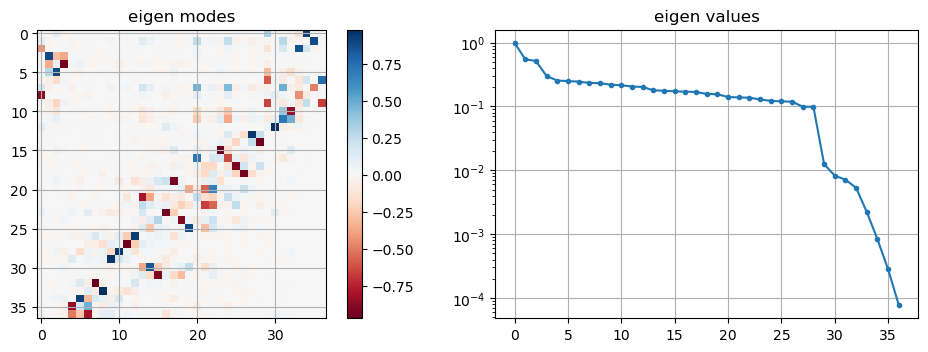

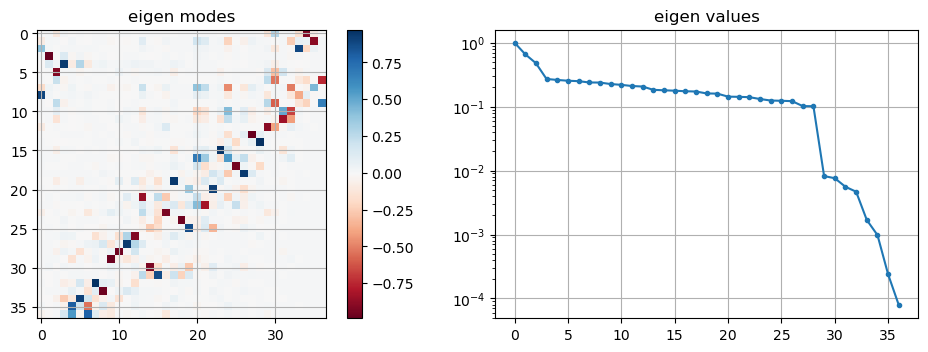

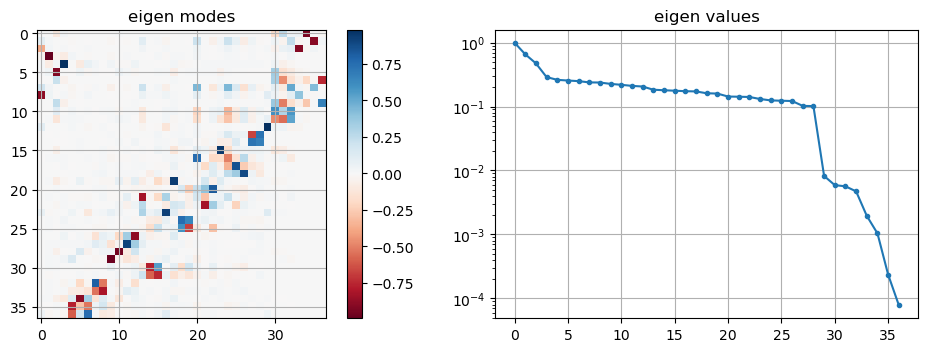

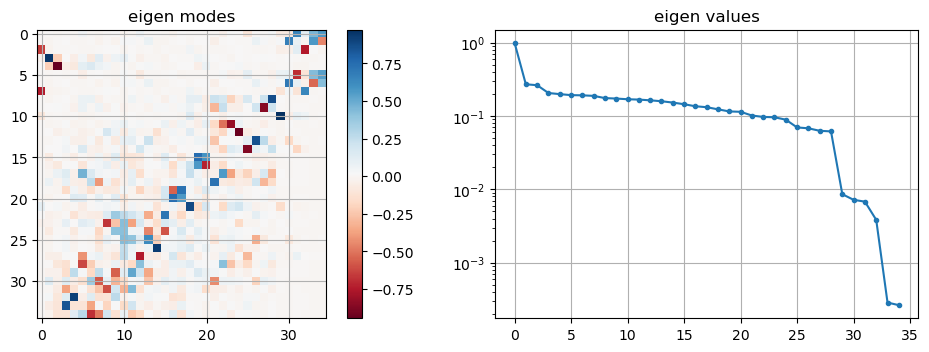

In [ ]:
for i in range(6):
    r1 = np.asarray(m1_rbm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(6,-1).T
    r2 = np.asarray(m2_rbm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(4,-1).T
    m = np.asarray(m1_bm['calib'][i]["m1_closed_loop_to_sensor"]['c']).reshape(27,-1).T
    mat = np.hstack([r1/np.linalg.norm(r1),r2/np.linalg.norm(r2),m/np.linalg.norm(m)])
    show_svd(mat)
r1 = np.asarray(m1_rbm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(5,-1).T
r2 = np.asarray(m2_rbm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(3,-1).T
m = np.asarray(m1_bm['calib'][6]["m1_closed_loop_to_sensor"]['c']).reshape(27,-1).T
mat = np.hstack([r1/np.linalg.norm(r1),r2/np.linalg.norm(r2),m/np.linalg.norm(m)])
show_svd(mat)